In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('GOOG.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
...,...,...,...,...,...,...,...
3804,2019-09-30,1220.969971,1226.000000,1212.300049,1219.000000,1219.000000,1404100
3805,2019-10-01,1219.000000,1231.229980,1203.579956,1205.099976,1205.099976,1273500
3806,2019-10-02,1196.979980,1196.979980,1171.290039,1176.630005,1176.630005,1615100
3807,2019-10-03,1180.000000,1189.060059,1162.430054,1187.829956,1187.829956,1621200


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']])


In [5]:
# Define the number of time steps
n_steps = 30  # You can adjust this value based on your preference

# Convert the data into sequences
X, y = [], []
for i in range(n_steps, len(scaled_data)):
    X.append(scaled_data[i - n_steps:i])
    y.append(scaled_data[i])


In [6]:
X = np.array(X) 
y = np.array(y)


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (3023, 30, 6)
X_test shape: (756, 30, 6)
y_train shape: (3023, 6)
y_test shape: (756, 6)


In [9]:
# Define the RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()


In [10]:
# Add an LSTM layer with 50 units (adjust as needed) and input shape based on the number of features and time steps
model.add(LSTM(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))

# Add dropout regularization to prevent overfitting
model.add(Dropout(0.2))

# Add a dense output layer with linear activation (for regression tasks)
model.add(Dense(units=y_train.shape[1], activation='linear'))


In [11]:
# Compile the model with mean squared error loss and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')


In [12]:
# Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Train on 3023 samples, validate on 756 samples
Epoch 1/10
3023/3023 [==============================] - 21s 7ms/sample - loss: 0.0179 - val_loss: 0.0015
Epoch 2/10
3023/3023 [==============================] - 9s 3ms/sample - loss: 0.0048 - val_loss: 9.9587e-04: 1 - ETA: 0s - loss: 0.
Epoch 3/10
3023/3023 [==============================] - 9s 3ms/sample - loss: 0.0037 - val_loss: 7.1640e-04
Epoch 4/10
3023/3023 [==============================] - 11s 4ms/sample - loss: 0.0034 - val_loss: 6.8980e-04
Epoch 5/10
3023/3023 [==============================] - 8s 3ms/sample - loss: 0.0028 - val_loss: 6.4406e-04
Epoch 6/10
3023/3023 [==============================] - 10s 3ms/sample - loss: 0.0025 - val_loss: 6.7479e-04
Epoch 7/10
3023/3023 [==============================] - 10s 3ms/sample - loss: 0.0022 - val_loss: 6.2345e-04
Epoch 8/10
3023/3023 [==============================] - 8s 3ms/sample - loss: 0.0021 - val_loss: 8.1174e-04
Epoch 9/10
3023/3023 [==============================] - 11s 4ms/s

In [13]:
# Evaluate the model on the testing set
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

756/756 [==============================] - 1s 1ms/sample - loss: 6.5513e-04
Test Loss: 0.0006551328170601101


In [14]:
y_pred=model.predict(X_test)
# Inverse transform the scaled data to get actual prices
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

# Extract dates from the original dataset
dates = data['Date'].values[n_steps+len(X_train):]

# Create a dataframe for actual and predicted prices along with dates
df_results = pd.DataFrame({
    'Date': dates,
    'Actual Price': y_test_inv[:, 3],
    'Predicted Price': y_pred_inv[:, 3]
})

# Print the dataframe
print(df_results)


           Date  Actual Price  Predicted Price
0    2016-10-04    284.214691       281.720978
1    2016-10-05    537.474365       544.715942
2    2016-10-06    584.274963       575.433350
3    2016-10-07    201.514679       202.692871
4    2016-10-10    164.353958       167.254639
..          ...           ...              ...
751  2019-09-30     92.254211        95.513931
752  2019-10-01    747.919983       769.915833
753  2019-10-02   1193.000000      1213.277954
754  2019-10-03    698.210022       710.808777
755  2019-10-04    751.609985       765.141907

[756 rows x 3 columns]


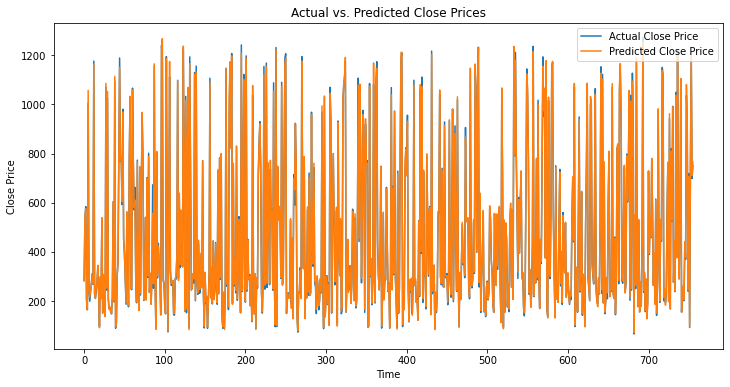

In [15]:

# Plotting the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:, 3], label='Actual Close Price')
plt.plot(y_pred_inv[:, 3], label='Predicted Close Price')
plt.title('Actual vs. Predicted Close Prices')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()
